#### Procesos Estocásticos 

Un proceso estocástico es una variable que evoluciona en el tiempo de manera aleatoria. Estos procesos pueden ser continuos o discretos. 

Uno de los procesos estocásticos discretos más usados en finanzas es el denominado *Random Walk* o camino aleatorio. Considere una variable aleatoria $z_t$ que tiene una posición inicial conocida, digamos $z_0$ y que $z_t$ puede aumentar o dismunior su valor en el periodo siguiente con cierte probabilidad. Al ser incierto que valor va a tomar el priodo siguiente, al cambio de variable (de período a período) se le asigna una distribución de probabilidad (por ejemplo la distribución normal). Se supone que estos cambios son independiente y se puede modelar la dinámica con la siguiente ecuación: 

$$ z_t = z_{t-1} + \epsilon_t $$

Donde $\epsilon_t$ sigue una normal con media cero y varianza $\sigma^2$. Este es un proceso muy usual en economía denominado AR(1) donde el coeficiente $z_{t-1}$ es unitario. 

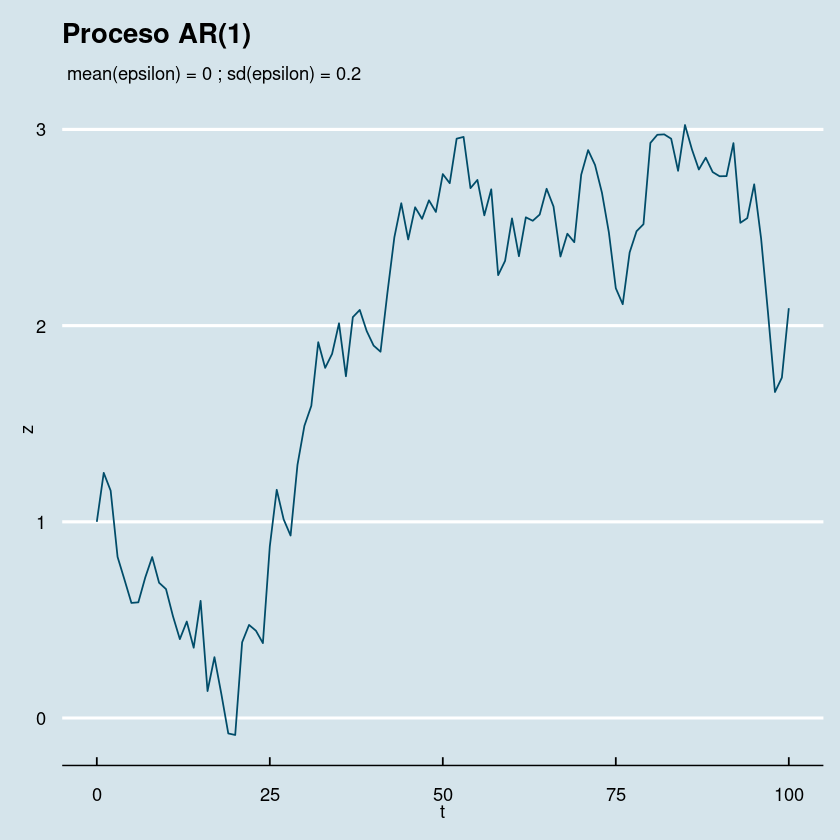

In [2]:
library(tidyverse); library(ggthemes)
z <- 1
sigma_2 <- 0.2
df <- data.frame(t = 0, z = 1)
for(i in c(1:100)) {
    e <- rnorm(1, mean = 0, sd = sigma_2)
    z <- z + e
    df[i + 1, ] <- c(i, z)
}
df  %>% ggplot() + 
  geom_line(aes(x = t, y = z), colour = "#004c69") +
  labs(title = "Proceso AR(1)",
       subtitle = "\n mean(epsilon) = 0 ; sd(epsilon) = 0.2") +
  theme_economist()

##### Propiedades del Random Walk 

Si se toma esperanza condicional a tiempo t-1 se cumple que $E[z_t|z_{t-1}] = z_{t-1}$. Esto se define como *propiedad de Martingala*: la mejor predicción que se puede hacer del valor futuro con la información disponible hasta t es el valor actual (esto es muy normal de asumir en los precios, de hecho Fama, una reconocido economista, ha insistio en que las trading rules son inutiles pues la mejor predicción de un precio es el valor actual del mismo). Por otro lado, como los cambios son independientes en el tiempo, la distribución de probabilidad de $z_t$ depende solamente de $z_{t-1}$ y no de información pasada. Esto se conoce como la *propiedad de Markov*. 

Una forma de entender un modelo autorregresivo es un proceso que luego de enfrentado a una perturbación tarda tiempo en regresar a su equilibrio de largo plazo. Por ejemplo, un productor de soja puede tener normalmente una cantidad determinada de producción. Pero si hay una sequía en un año, el proximo año va a depender de la producción a partir de la sequía y no de los periodos de normalidad. 

##### Procesos de Wiener y Brownian Motion 

Hasta aquí se presentó un proceso estocástico descrito, el Random Walk. Un proceso análogo en *tiempo continuo* es el que se conoce como Proceso de Wiener o, una vez generalizado, Brownian Motion. Hay varias formas de desarrollar este proceso, que por simplicidad, se presentará sobre la base del Random Walk con varianza unitaria. La idea es dividir repetidas veces el intervalo unitario cracterístico de los procesos discretos hasta hacer la unidad de tiempo tan pequeño como se quiera (en el límite, infinitesimalmente pequeña, es decir, continua). 

Por ejemplo, tomando la ecuación presentada anteriormente, vemos que el término error puede expresarse $\epsilon_t = z_t - z_{t-1}$, que sabemos sigue una distribución normal con media cero y varianza unitaria para nuestro desarrollo. Al considerar intervalos de tiempo que son la mitad de los intervalos orginales, y considerando que los errores de distribuyen normales e independientes se tiene que: $z_t - z_{t-1} = \epsilon_t = e_{1t} + e_{2t}$ con $e_{it}$ disbtribuyendose normal con media cero y varianza 1/2. Si se repitiese este proceso n veces llegamos a que: 

$$ z_t - z_{t-1} = e_{1t} + e_{2t} + \dots + e_{Nt} $$ 

En particular 

$$ z_t - z_{t-\frac{1}{N}} = e_{it}$$ 

Con $e_{it}$ distribuyendose normal con media cero y varianza 1/N. Para llevarlo a tiempo continuo redefinimos los intervalos, $1/N = \Delta_t$ donde 

$$ \Delta z = z_t - z_{t-\Delta t} = e_t$$

Con $e_t$ distribuyendose normal con media cero y varianza $\Delta t$. 

Por constriucción al haber dividido el intervalo unitario N veces (de dimensión 1 a dimensión $\Delta t$) $e_t$ tiene varianza $\Delta t$. Por lo tanto, tomando $e_t$ como un error gausiano con una distribución Normal estándar, se cumple que: 

$$ e_t = \sqrt{\Delta t} \epsilon_t \sim N(0, \Delta t)$$

Por lo tanto, haciendo el intervalo tan pequeño como se quiera (haciendo N tender a infinito) se puede expresar la diferencia de $z_t$ (dz) como 

$$ dz = \sqrt{dt} \epsilon_t $$ 

Que es justamente la ecuación conocida como un Proceso de Wiener o un Brownian Motion Standar. Este proceso (al igual que el Random Walk) posee importantes propiedades: 

1. Los incrementos de la variable aleatoria $z_t$ son independientes. 
2. $z_t$ sigue un proceso de Markow 
3. $z_t$ es una Martingala ($E[dz_t] = 0$)
4. La varianza de $z_t$ no depende del tiempo sino del intervalo de tiempo ($E[dz_t^2]= dt$) [esto puede resultar contraintuitivo, pero se puede demostrar que la variable aleatoria $\epsilon_t$ se degenera en un punto] 
5. La función $t \rightarrow z_t$ es una función continua en todo su dominio 
6. Los incrementos están distribuídos normalmente

Un problema que se presenta al intentar caracterizar precios con este proceso estocástico es que los precios no pueden ser negativos. Para superar este problmea generalmente se utiliza para los incrementos la distribución log-Normal

##### Brownian Motion con drift y desviación instantanea 

Caracterizar variables financieras -por ejemplo los retornos aleatorios- como una Brownian Motion con varianza dt y valor esperado 0 es innecesariamente restrictivo. Alternativamente podemos considerar un proceso que generaliza la ecuación desarrollada anteriormente, por ejemplo con una varianza igual a $\sigma^2$ y con una tendencia $\mu$. Consideremos la variable: 

$$ \Delta x = x_t - x_{t-1} \sim N(\mu, \sigma^2)$$ 

Por lo que la variable estandarizada sería: 

$$ \dfrac{x_t - x_{t-1} - \mu}{\sigma} = \epsilon_t $$

con $\epsilon_t$ normal estándar. Reordenando los términos de la ecuación y considerando cambios infinitesimalmente pequeños, en lugar de unitarios, la ecuación puede escribirse como: 

$$ dx_t = \mu dt + \sigma \sqrt{dt}\epsilon_t $$ 

Recordando la definición de proceso de Wiener podemos definir una Brownian Motion con drift: 

$dx_t = \mu dt + \sigma dz $

Por su parte $x_t$ satisface que: 

1. $E[dx_t] = \mu dt $
2. $V[dx_t] = \sigma^2 dt$

Como se verá en el gráfico siguiente, se está asumiendo que a lo largo del tiempo será lineal con pendiente $\mu$. 

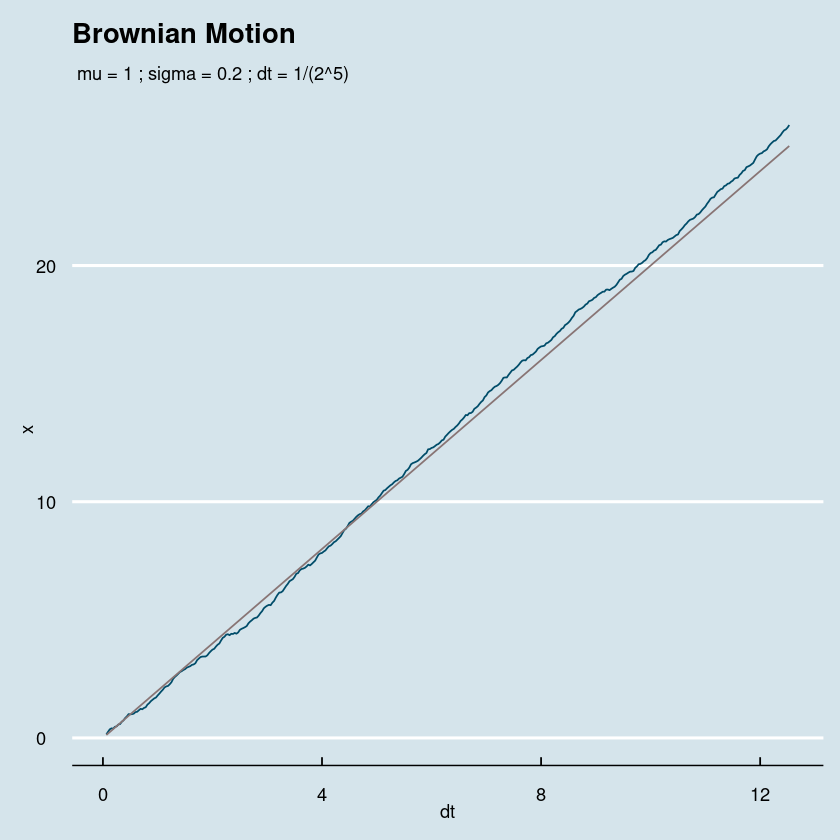

In [21]:
mu <- 2
sigma <- 0.2
T <- 1
n <- 2^5
dt <- T / n
x <- mu * dt
tend <- x
dt_count <- dt
df <- data.frame(dt = dt_count, x = x, tend = tend)
for(i in 1:400) {
    e <- rnorm(1, mean = 0, sd = 1)
    x <- x + mu * dt + sigma * sqrt(dt) * e
    tend <- tend + dt * mu
    dt_count <- dt_count + dt
    df[i, ] <- c(dt_count, x, tend)
}
df  %>% ggplot() +
  geom_line(aes(x = dt, y = x), colour = "#004c69") +
  geom_line(aes(x = dt, y = tend), colour = "#887474") +
  labs(title = "Brownian Motion",
       subtitle = "\n mu = 1 ; sigma = 0.2 ; dt = 1/(2^5)") +
  theme_economist()


##### Brownian Motion Geométrica

A continuación se presenta un nuevo proceso estocástico que va a ser de utilidad en los proximos capitulos.

Se dice que $x_t$ sigue un proceso GBM (geometric brownian motion) si satisface la siguiente ecuación diferencial estocástica: 

$$ d x_t = \mu x_t dt + \sigma x_t dz $$ 

Notemos que la función $ F(x) = log(x) $ en este contexto sigue una Brownian Motion con drift: 

$$ dF = (\mu - \frac{\sigma}{2}) dt + \sigma dz $$ 

Sabemos entonces que la función $x_t$ si se le asigna un proceso de tipo GBM será un movimiento con tendencia exponencial de tipo $e^{\mu dt}$. Para ver esto claramente aplicamos lema de ITO (si no se conoce se dará una explicación sencilla en la proxima sección) a la función F: 

$$ d(log(x_t)) = (log(x_t))' dx_t + \dfrac{1}{2} (log(x_t))'' (dx_t)^2 $$ 

$$ d(log(x_t)) = \dfrac{1}{x_t} dx_t + \dfrac{1}{2} \dfrac{(-1)}{x_t^2} (\mu^2 (x_t)^2 (dt)^2 + 2 \mu (x_t)^2 dt dz + \sigma^2 (x_t^2) (dz)^2) $$

Eliminando los términos que tienden muy rápido a cero ($dt^n$ para $n \geq 1$) y recordando que $(dz)^2 = dt$ sabemos que: 

$$ d(log(x_t)) = \dfrac{dx}{x_t} - \dfrac{1}{2} \dfrac{1}{x_t^2} (\sigma^2 (x_t^2) dt) $$ 

Utilizando la aproximación logaritmica del diferencial a la izquierda y la definción de la GBM a la derecha se llega a: 

$$ ln\left ( \dfrac{x_t}{x_{t-1}}\right) = (\mu dt + \sigma dz) - \dfrac{\sigma^2 dt}{2} $$ 

$$ ln\left ( \dfrac{x_t}{x_{t-1}}\right) = \left ( \mu - \dfrac{\sigma^2}{2} \right) dt + \sigma dz $$ 

Aplicancdo función exponencial a ambos lados de la ecuación: 

$$  \dfrac{x_t}{x_{t-1}} = exp\left \{\left( \mu - \dfrac{\sigma^2}{2} \right) dt + \sigma dz \right\} $$

De modo que para momento del tiempo vale que: 

$$  {x_t}= x_{t-1} exp\left \{\left( \mu - \dfrac{\sigma^2}{2} \right) dt + \sigma dz \right\} $$







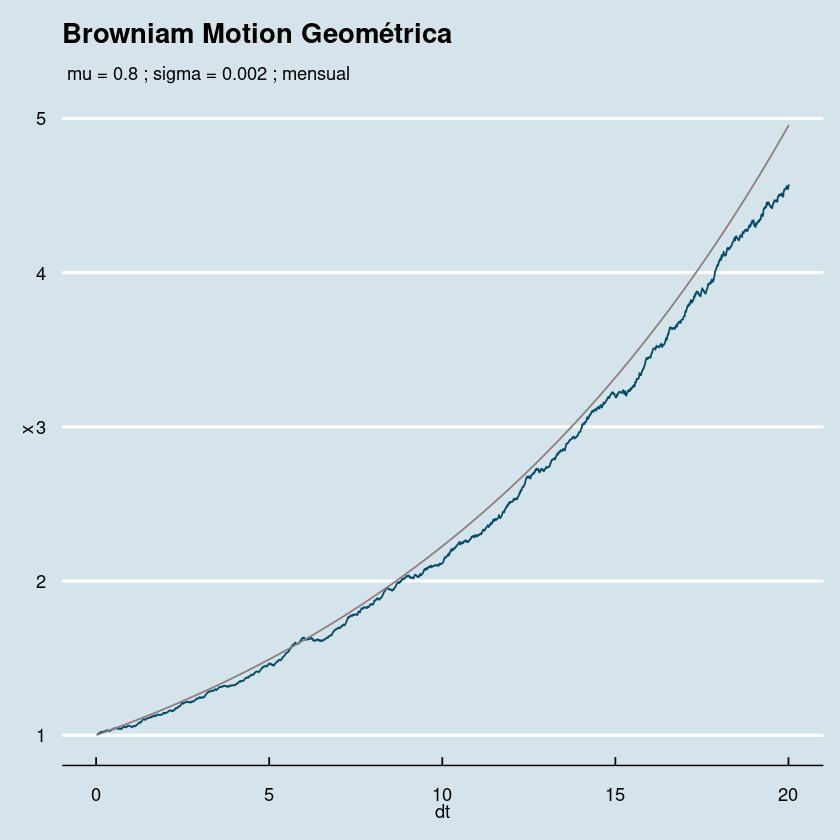

In [10]:
mu <- 0.08
x <- exp(mu * dt)
sigma <- 0.02
dt <- 1 / 100 #mensual
dt_count <- dt
df <- data.frame(dt = dt_count, x = x, tend = exp(mu * dt))
for(i in 1:2000) {
    epsilon <- rnorm(1, mean = 0, sd = 1)
    dz <- sqrt(dt) * epsilon
    x <- x * exp((mu - sigma^2 / 2) * dt + sigma * dz)
    dt_count <- dt_count + dt
    df[i, ] <- c(dt_count, x, exp(mu * dt_count))
}
df  %>% ggplot() + 
  geom_line(aes(x = dt, y = x), colour = "#004c69") +
  geom_line(aes(x = dt, y = tend), colour = "#8d7d7d") +
  labs(title = "Browniam Motion Geométrica", 
       subtitle = "\n mu = 0.8 ; sigma = 0.002 ; mensual") +
  theme_economist()


#### Lema de Ito 

Muchas veces vamos a trabajar con funciones de procesos estocásticos y será necesario tomar el diferencial de dicha función. Un ejemplo natural surge cuando debemos encontrar el precio de una opción que es una función del retorno de algún stock. La noción de derivada que se usa en cálculo aquí no sirve, pues la noción determinística de límite no se puede aplicar directamente a una variable aleatoria (donde uno debe considerar aspectos como el orden de convergencia de esas variables). Nosotros, para diferencias (en forma bastante mecánica) un proceso estocástico vamos a utilizar una versión muy simplificada del Lema de Ito, también conocido como Teorema Fundamental del Cálculo Estocástico. 

En primer lugar definimos $y = F(x_t, t)$ donde $x_t$ es un proceso estocástico. Queremos encontrar una expresión para dy. Si bien la demostración de dicho teorema es complicada, vamos a ver una versión intuitiva que encuentra esa derivada como una expansión de Taylor. Escribiendo a dF(.) como una serie de Taylor (una expansión de $F(.)_{t+dt}$ alrededor del ($x_t, t$)), se obtiene: 

$$ dF = f_x d x_t + F_t dt + \frac{1}{2}(F_{xx}(dx_t)^2 + F_{tt}(dt)^2 + f_{xt}(dx_t dt) + f_{tx}(dx_t dt)) $$ 

Donde $dF = F(.)_{t+dt} - F(.)_t$, y $dx_t = x_{t+dt} - x_t$. Ahora bien, recordando el *teorema de Clairaut* sabemos que $f_{xt} $ y $f_{tx}$ son equivalentes dados los supuestos ususales que hacemos sobre F. Con esto y asumiendo $dx_t = \mu dt + \sigma dz$, reemplanzamos los $dx_t$ en la ecuación anterior y obtenemos la siguiente expresión: 

$$ dF = f_x (\mu dt + \sigma dz) + F_t dt + \frac{1}{2}F_{xx}(\mu dt + \sigma dz)^2 + \frac{1}{2}F_{tt}(dt)^2 + f_{xt}((\mu dt + \sigma dz)dt) $$ 

Ahora se considera cuán pequeño es un intervalo para que pueda considerarse que los términos que multiplican dicho intervalor puedan ignorarse en la expansión de Taylor. Se dice que los $(dt)^m$ con $m>1$ convergen muy rapidamente a cero y por lo tanto todos los términos de la expansión de Taylor que estén multiplicados por dicho término se consideran despreciables (los invervalos de tiempo que queremos son muy pequeños, si los exponenciamos a un número mayor a uno estos tienden a cero muy rapidamente, por lo cual los consideraremos despreciables). De modo que: 


$\therefore d F=F_x \mu d t+F_x \sigma d z+F_t d t+\frac{1}{2} F_x\left[\mu^2 d d t^2+2 \mu d t \cdot d z \sigma+\sigma^t(d z)^2\right]+\frac{1}{2} F_{t t}(d t)^2+F_{x t} \mu(d t)^2+F_{x t} \sigma d z  d t$

Teniendo lo anterior en cuenta y sabiendo que, además, $dz = \sqrt{dt}\epsilon \implies dt \cdot dz = (dt)^\frac{3}{2}\epsilon$. Podemos concluir entonces que debe ser cierto: 

$$ d F=F_x \mu d b+F_x \sigma d z+F_t d t+F_x \sigma^2 d t $$

$$ d F=\left(F_x \mu+F_t+F_x \sigma^2\right) d t+F_x \sigma d z $$

Como se puede ver, F también sigue una Brownian Motion. 